In [22]:
# Motivation plot for failover
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
from collections import namedtuple
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

sns.set_theme(style="whitegrid", font_scale=1.5)
sns.set_style("ticks")
plt.rcParams["font.family"] = "Times New Roman"
# Set the font used for MathJax - more on this later
plt.rc('mathtext',**{'default':'regular'})

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('axes', titlesize=20, titleweight=3)
plt.rc('legend',fontsize='14')
plt.rcParams['legend.title_fontsize'] = '14'
colors = ['black', 'red', 'blue', 'green', 'purple', "brown", "orange", "pink"]
dashes = ['-', ':', '-.', '--', (0, (3, 5, 1, 5, 1, 5)), ":"]
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'X', 'd', '|', '_', '+', 'x', '.']
mpl.rcParams['hatch.linewidth'] = 1
matplotlib.rcParams['pdf.fonttype'] = 42
print(sns.__version__)

0.13.2


```INPUT_DIR``` has data files curated from the ```data/``` folder to derive the plots.

In [24]:
INPUT_DIR = "../plots/plot-data"
OUTPUT_DIR = "../plots"

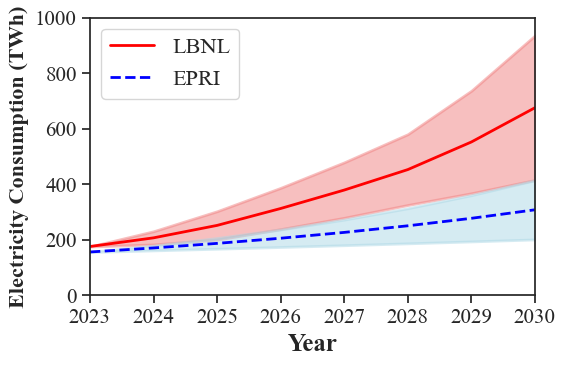

In [ ]:
def usDCLoadGrowthEPRILBNL():
    data = pd.read_csv(f"{INPUT_DIR}/us-dc-demand-growth-epri-lbnl.csv", header=0)
    
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # LBNL
    plt.plot(data["Year"], (data["Upper_LBNL"]+data["Lower_LBNL"])/2, label="LBNL", color="red", linewidth=2, linestyle="-")
    plt.fill_between(data["Year"], data["Upper_LBNL"], data["Lower_LBNL"], color="lightcoral",  linewidth=2, alpha=0.5) #edgecolor="darkred",

    # EPRI
    plt.plot(data["Year"], (data["Upper_EPRI"]+data["Lower_EPRI"])/2, label="EPRI", color="blue", linewidth=2, linestyle="--")
    plt.fill_between(data["Year"], data["Upper_EPRI"], data["Lower_EPRI"], color="lightblue",  linewidth=2, alpha=0.5) #edgecolor="darkblue",




    plt.xlim(2023, 2030)
    plt.ylim(0, 1000)

    plt.xticks(range(2023, 2031), fontsize=15, fontweight='ultralight')
    plt.yticks(range(0, 1001, 200), fontsize=15,  fontweight='ultralight')
    
    plt.xlabel("Year", fontsize=18, fontweight='bold')
    plt.ylabel("Electricity Consumption (TWh)", fontsize=16, fontweight='bold')
    plt.legend(fontsize=16, loc='upper left')
    plt.tight_layout()
    
    # plt.show()
    fig.savefig(f"{OUTPUT_DIR}/us-dc-load-growth-epri-lbnl.pdf", bbox_inches='tight') #, pad_inches=0)
    return

usDCLoadGrowthEPRILBNL()

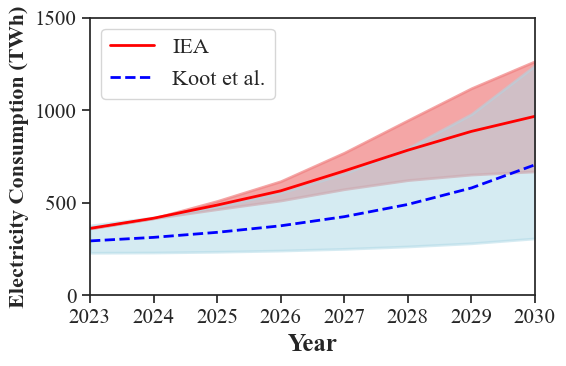

In [ ]:
def globalDCLoadIEAKoot():
    fig, ax = plt.subplots(figsize=(6, 4))
    data = pd.read_csv(f"{INPUT_DIR}/global-dc-demand-growth-iea-koot.csv", header=0)

    # IEA
    plt.plot(data["Year"], data["Avg_IEA"], label="IEA", color="red", linewidth=2, linestyle="-")
    plt.fill_between(data["Year"], data["Upper_IEA"], data["Lower_IEA"], color="lightcoral", linewidth=2, alpha=0.7) #edgecolor="darkgreen", 

    # Koot
    plt.plot(data["Year"], data["Avg_Koot"], label="Koot et al.", color="blue", linewidth=2, linestyle="--")
    plt.fill_between(data["Year"], data["Upper_Koot"], data["Lower_Koot"], color="lightblue",  linewidth=2, alpha=0.5) #edgecolor="darkblue",
     
    #IEA with LBNL projections
    # plt.plot(data["Year"], data["Avg_IEA_LBNL_projection"], label="IEA using LBNL CAGR", color="red", linewidth=2, linestyle="-.")
    # plt.fill_between(data["Year"], data["IEA_using_LBNL_projection_worst"], data["IEA_using_LBNL_projection_best"], color="lightcoral",  linewidth=2, alpha=0.7) #edgecolor="darkred",


    plt.xlim(2023, 2030)
    plt.ylim(0, 1500)

    plt.xticks(range(2023, 2031), fontsize=15, fontweight='ultralight')
    plt.yticks(range(0, 1501, 500), fontsize=15,  fontweight='ultralight')
    
    plt.xlabel("Year", fontsize=18, fontweight='bold')
    plt.ylabel("Electricity Consumption (TWh)", fontsize=16, fontweight='bold')
    plt.legend(fontsize=16, loc='upper left')
    plt.tight_layout()
    

    # plt.xticks(fontsize=18)
    # plt.yticks(fontsize=18)
    # plt.xlabel("Year", fontsize=20)
    # plt.ylabel("Emissions (MtonCO2eq)", fontsize=20)
    # plt.legend(fontsize=16)
    # plt.tight_layout()
    # plt.ylim(0)
    # plt.show()
    fig.savefig(f"{OUTPUT_DIR}/global-dc-load-growth-iea-koot.pdf", bbox_inches='tight')
    return

globalDCLoadIEAKoot()

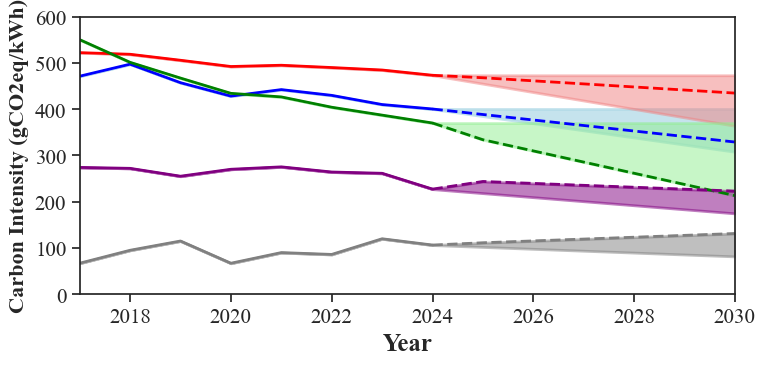

In [6]:
def ciProjectionsVariousRegions():
    data = pd.read_csv(f"{INPUT_DIR}/ci-projections-various-regions.csv")

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 4))

    # US
    plt.plot(data["Year"][:8], data["US_CD"][:8], label="US", color="blue", linewidth=2)
    plt.plot(data["Year"][7:], data["US_CD"][7:], label="US", color="blue", linewidth=2, linestyle='--')
    plt.fill_between(data["Year"], data["US_NC"], data["US_ZC50"], color="lightblue", linewidth=2, alpha=0.7) #edgecolor="darkblue", 

    # Global
    plt.plot(data["Year"][:8], data["Global_CD"][:8], label="Global", color="red", linewidth=2)
    plt.plot(data["Year"][7:], data["Global_CD"][7:], label="Global", color="red", linewidth=2, linestyle='--')
    plt.fill_between(data["Year"], data["Global_NC"], data["Global_ZC50"], color="lightcoral",  linewidth=2, alpha=0.5) #edgecolor="darkred",

    # Texas
    plt.plot(data["Year"][:8], data["Texas_CD"][:8], label="Texas", color="green", linewidth=2)
    plt.plot(data["Year"][7:], data["Texas_CD"][7:], label="Texas", color="green", linewidth=2, linestyle='--')
    plt.fill_between(data["Year"], data["Texas_NC"], data["Texas_CD"], color="lightgreen",  linewidth=2, alpha=0.5) #edgecolor="darkgreen",

    # Washington
    plt.plot(data["Year"][:8], data["Washington_CD"][:8], label="Washington", color="gray", linewidth=2)
    plt.plot(data["Year"][7:], data["Washington_CD"][7:], label="Washington", color="gray", linewidth=2, linestyle='--')
    plt.fill_between(data["Year"], data["Washington_CD"], data["Washington_ZC50"], color="gray", linewidth=2, alpha=0.5) #edgecolor="darkgray",
    

    # California
    plt.plot(data["Year"][:8], data["California_CD"][:8], label="California", color="purple", linewidth=2)
    plt.plot(data["Year"][7:], data["California_CD"][7:], label="California", color="purple", linewidth=2, linestyle='--')
    plt.fill_between(data["Year"], data["California_CD"], data["California_ZC50"], color="purple", linewidth=2, alpha=0.5) #edgecolor="indigo",

    # Add labels and legend

    plt.xlim(2017, 2030)
    plt.ylim(0, 600)

    plt.xticks(range(2018, 2031, 2), fontsize=15, fontweight='ultralight')
    plt.yticks(range(0, 601, 100), fontsize=15,  fontweight='ultralight')
    
    plt.xlabel("Year", fontsize=18, fontweight='bold')
    plt.ylabel("Carbon Intensity (gCO2eq/kWh)", fontsize=16, fontweight='bold')
    # plt.legend(fontsize=15,  ncols=5, bbox_to_anchor=(0.5, 2), columnspacing=0.2,) #loc='center left',
    plt.tight_layout()    

    # Show the plot
    # plt.show()
    fig.savefig(f"{OUTPUT_DIR}/ci-projections-various-regions_wider.pdf", bbox_inches='tight')
    return

ciProjectionsVariousRegions()

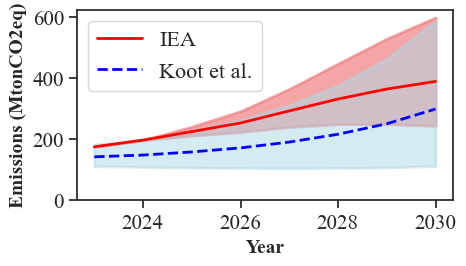

In [10]:
def globalEmissionsIEAKoot():
    fig, ax = plt.subplots(figsize=(5, 3))
    data = pd.read_csv(f"{INPUT_DIR}/global-emissions-iea-koot.csv", header=0)

    # IEA
    plt.plot(data["Year"], data["Avg_IEA"], label="IEA", color="red", linewidth=2, linestyle="-")
    plt.fill_between(data["Year"], data["Upper_IEA"], data["Lower_IEA"], color="lightcoral",  linewidth=2, alpha=0.7) #edgecolor="darkgreen",

    # Koot
    plt.plot(data["Year"], data["Avg_Koot"], label="Koot et al.", color="blue", linewidth=2, linestyle="--")
    plt.fill_between(data["Year"], data["Upper_Koot"], data["Lower_Koot"], color="lightblue",  linewidth=2, alpha=0.5) #edgecolor="darkblue",
      
    plt.xticks(fontsize=15, fontweight='ultralight')
    plt.yticks(fontsize=15, fontweight='ultralight')
    plt.xlabel("Year", fontsize=14, fontweight='bold')
    plt.ylabel("Emissions (MtonCO2eq)", fontsize=14, fontweight='bold')
    plt.legend(fontsize=16)
    plt.tight_layout()
    plt.ylim(0)
    plt.show()
    fig.savefig(f"{OUTPUT_DIR}/global-emissions-iea-koot.pdf", bbox_inches='tight')
    return

globalEmissionsIEAKoot()

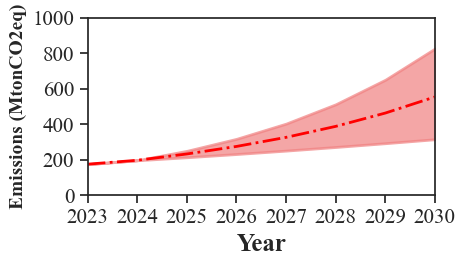

In [7]:
def globalEmissionsIEAwLBNL():
    fig, ax = plt.subplots(figsize=(5, 3))
    data = pd.read_csv(f"{INPUT_DIR}/global-emissions-iea-koot.csv", header=0)
    
    #IEA with LBNL projections
    plt.plot(data["Year"], data["Avg_IEA_with_LBNL_CAGR"], label="IEA using LBNL CAGR", color="red", linewidth=2, linestyle="-.")
    plt.fill_between(data["Year"], data["Upper_IEA_with_LBNL_CAGR"], data["Lower_IEA_with_LBNL_CAGR"], color="lightcoral",  linewidth=2, alpha=0.7) #edgecolor="darkred",

    plt.xlim(2023, 2030)
    plt.ylim(0, 100)

    plt.xticks(range(2023, 2031), fontsize=15, fontweight='ultralight')
    plt.yticks(range(0, 1001, 200), fontsize=15,  fontweight='ultralight')
    
    plt.xlabel("Year", fontsize=18, fontweight='bold')
    plt.ylabel("Emissions (MtonCO2eq)", fontsize=14, fontweight='bold')
    # plt.legend(fontsize=16, loc='upper left')
    plt.tight_layout()
    
    fig.savefig(f"{OUTPUT_DIR}/global-emissions-iea-lbnl.pdf", bbox_inches='tight')
    return

globalEmissionsIEAwLBNL()

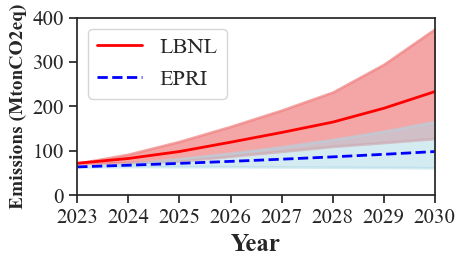

In [13]:
def usEmissionsEPRILBNL():
    data = pd.read_csv(f"{INPUT_DIR}/us-emissions-epri-lbnl.csv", header=0)
    # plt.figure(figsize=(10, 6))
    fig, ax = plt.subplots(figsize=(5, 3))
    
    # LBNL
    plt.plot(data["Year"], data["Avg_LBNL"], label="LBNL", color="red", linewidth=2, linestyle="-")
    plt.fill_between(data["Year"], data["Upper_LBNL"], data["Lower_LBNL"], color="lightcoral",  linewidth=2, alpha=0.7) #edgecolor="darkred", 
    
    
    # EPRI
    plt.plot(data["Year"], data["Avg_EPRI"], label="EPRI", color="blue", linewidth=2, linestyle="--")
    plt.fill_between(data["Year"], data["Upper_EPRI"], data["Lower_EPRI"], color="lightblue", linewidth=2, alpha=0.5) #edgecolor="darkblue", 



    plt.xlim(2023, 2030)
    plt.ylim(0, 400)

    plt.xticks(range(2023, 2031), fontsize=15, fontweight='ultralight')
    plt.yticks(range(0, 401, 100), fontsize=15,  fontweight='ultralight')
    
    plt.xlabel("Year", fontsize=18, fontweight='bold')
    plt.ylabel("Emissions (MtonCO2eq)", fontsize=14, fontweight='bold')
    plt.legend(fontsize=16, loc='upper left')
    plt.tight_layout()

    fig.savefig(f"{OUTPUT_DIR}/us-emissions-epri-lbnl.pdf", bbox_inches='tight')
    return

usEmissionsEPRILBNL()

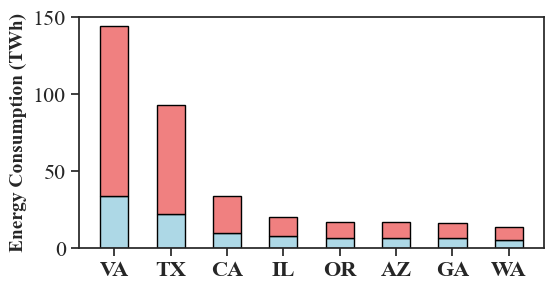

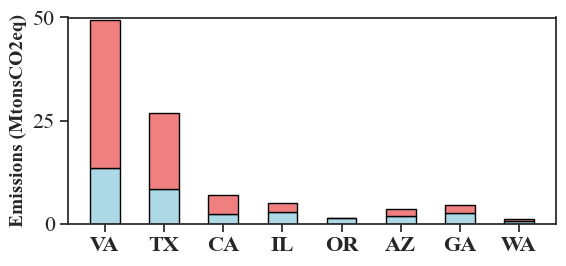

In [15]:
def loadVsEmissionsTop8():
    data = pd.read_csv(f"{INPUT_DIR}/us-states-demand-vs-emissions-top8.csv", header=0)
    states = data["States"].values
    load_2023 = data["Load-2023"].values
    load_diff = data["Load-diff-2030"].values
    emissions_2023 = data["Emissions-2023"].values
    emissions_2030_diff = data["Emissions-diff-2030"].values
    
    # X positions
    x = np.arange(len(states))
    width = 0.5

    fig1, ax1 = plt.subplots(figsize=(6, 3))

    # --- Stacked Bar Plot ---
    ax1.bar(x, load_2023, width, label='2023', color='lightblue', ec='black')
    ax1.bar(x, load_diff, width, bottom=load_2023, label='2030 Increase', color='lightcoral', ec='black')
    ax1.set_ylim([0, 150])
    ax1.set_ylabel('Energy Consumption (TWh)', fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_yticks([0, 50, 100, 150])
    ax1.set_xticklabels(states, fontsize=16, fontweight='bold')
    ax1.tick_params(axis='y', labelsize=16)
    # ax1.legend(fontsize=20, ncols=2, bbox_to_anchor=(0.5, 2))


    # --- Emissions Line Plot with Error Bars ---
    # --- Stacked Bar Plot ---
    fig2, ax2 = plt.subplots(figsize=(6, 3))
    ax2.bar(x, emissions_2023, width, label='2023', color='lightblue', ec='black')
    ax2.bar(x, emissions_2030_diff, width, bottom=emissions_2023, label='Increase by 2030', color='lightcoral', ec='black')
    ax2.set_ylim([0, 50])
    ax2.set_ylabel('Emissions (MtonsCO2eq)', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_yticks([0, 25, 50])
    ax2.set_xticklabels(states, fontsize=16, fontweight='bold')
    ax2.tick_params(axis='y', labelsize=16)
    # ax2.legend(fontsize=20)


    plt.tight_layout()
    # plt.show()
    
    fig1.savefig(f"{OUTPUT_DIR}/state-top8-load.pdf", bbox_inches='tight')
    fig2.savefig(f"{OUTPUT_DIR}/state-top8-emissions.pdf", bbox_inches='tight')

    return

loadVsEmissionsTop8()

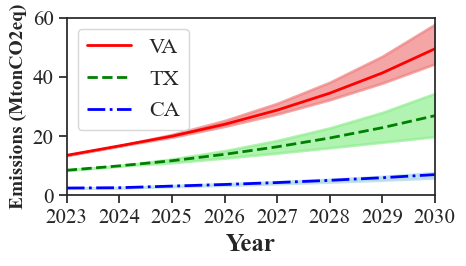

In [21]:
def stateEmissionTrends():
    # Data
    data = pd.read_csv(f"{INPUT_DIR}/us-states-emissions-projections.csv", header=0)
    avg_data = {
        "Year": data["Year"].values,
        "VA": data["VA-emissions-avg"].values,
        "TX": data["TX-emissions-avg"].values,
        "CA": data["CA-emissions-avg"].values
    }

    upper_data = {
        "VA": data["VA-emissions-upper"].values,
        "TX": data["TX-emissions-upper"].values,
        "CA": data["CA-emissions-upper"].values
    }

    lower_data = {
        "VA": data["VA-emissions-lower"].values,
        "TX": data["TX-emissions-lower"].values,
        "CA": data["CA-emissions-lower"].values
    }

    # Convert to DataFrame
    df = pd.DataFrame(avg_data)

    # Plot
    mkr = ["o", "x", "^"]
    color = ["red", "green", "blue"]
    fillColor = ["lightcoral", "lightgreen", "lightblue"]
    ecolors = ['darkred', 'darkgreen','darkblue']
    linestyles = ['-', '--', '-.']
    idx = 0
    fig, ax = plt.subplots(figsize=(5, 3))
    for state in df.columns[1:]:
        plt.plot(df['Year'], df[state], color = color[idx], label=state, linewidth=2, ls=linestyles[idx]) #, marker=mkr[idx], 
        plt.fill_between(avg_data["Year"], upper_data[state], lower_data[state], color=fillColor[idx], linewidth=2, alpha=0.7) #, edgecolor=ecolors[idx]
        idx +=1


    plt.xlim(2023, 2030)
    plt.ylim(0, 60)

    plt.xticks(range(2023, 2031), fontsize=15, fontweight='ultralight')
    plt.yticks(range(0, 61, 20), fontsize=15,  fontweight='ultralight')
    
    plt.xlabel("Year", fontsize=18, fontweight='bold')
    plt.ylabel("Emissions (MtonCO2eq)", fontsize=14, fontweight='bold')
    plt.legend(fontsize=16, loc='upper left')
    plt.tight_layout()

    # plt.xlabel()
    # plt.ylabel('Emissions (MTonsCO2eq)', fontsize=20)
    # plt.legend(fontsize=20)
    # plt.xticks(fontsize=20)
    # plt.yticks(fontsize=20)
    # plt.tight_layout()
    # plt.show()
    fig.savefig(f"{OUTPUT_DIR}/state-emission-trends.pdf", bbox_inches='tight')
    return

stateEmissionTrends()

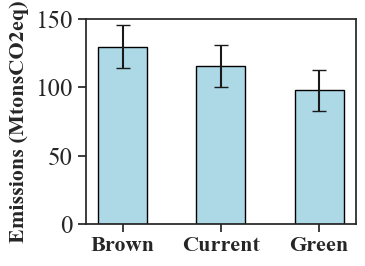

In [44]:
def capacityProvisioning():

    data = pd.read_csv(f"{INPUT_DIR}/us-states-emissions-2030-alternate-demand.csv", header=0, index_col=["Categories"])
    categories = data.index.values

    # green_vals = [129.8098693, 106.822383, 97.63480974]
    # green_errs = [
    #     np.std([151.6482806, 121.1288037, 116.6525235]),
    #     np.std([127.1972443, 95.42587084, 97.84403404]),
    #     np.std([118.061885, 84.02570969, 90.81683458]),
    # ]

    avg_vals = data["Avg"].values
    err_bars = [
        np.std(data.loc["Brown", ["NC", "CD", "ZC50"]].tolist()),
        np.std(data.loc["Current", ["NC", "CD", "ZC50"]].tolist()),
        np.std(data.loc["Green", ["NC", "CD", "ZC50"]].tolist()),
    ]

    

    x = np.arange(len(categories))

    # Create side-by-side subplots
    fig, ax = plt.subplots(figsize=(4, 3))

    
    # Brown subplot
    ax.bar(x, avg_vals, yerr=err_bars, capsize=5, color='lightblue',  width=0.5, ec='black')
    ax.set_ylabel('Emissions (MtonsCO2eq)', fontsize=16, fontweight='bold')  # Add y-axis label here too
    ax.set_xticks(x)
    ax.set_ylim([0, 150])
    ax.set_yticks([0, 50, 100, 150])
    ax.set_xticklabels(categories, fontsize=16, fontweight='bold')
    ax.tick_params(axis='y', labelsize=18)
    ax.yaxis.set_tick_params(labelleft=True)

    plt.tight_layout()
    # plt.show()
    fig.savefig(f"{OUTPUT_DIR}/capacity-provisioning.pdf", bbox_inches='tight')

    return

capacityProvisioning()